In [125]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg   # https://pingouin-stats.org/build/html/index.html  usede for calculation of cronbach_alpha

In [126]:
df= pd.read_csv("Airline_Passenger_Satisfaction_train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [127]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [128]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

---
### Correlation Visualization
A quick look at the correlation matrix suggest there are underlying factors.  In particular it looks like there may be underlying factors with these variables.

* Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, and Gate location are correlated.
* Food and drink, Online boarding, Seat comfort, Inflight entertainment, and cleanliness
* Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, and Inflight service

C:\Users\jspinega\AppData\Local\Temp\ipykernel_26868\2369852186.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


<AxesSubplot: >

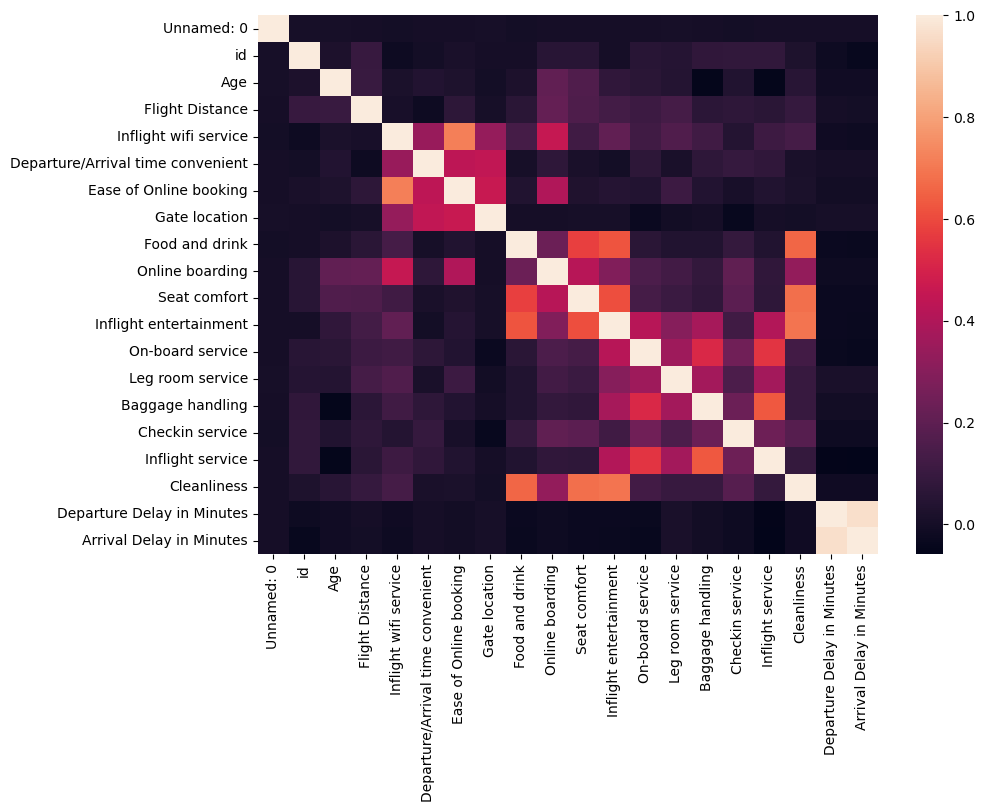

In [129]:
plt.figure(figsize=(10,7))
c= df.corr()
sns.heatmap(c)

In [130]:
# Extreamly high coorilation between “Departure Delay in Minutes” and the “Arrival Delay in Minutes” suggest that they are actually measuring the same thing.
# So, we drop one of these varaiables.
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [131]:
 # Subset of the data, the 14 columns containing the survey answers
 # this is the data set from the tutorial 
 # https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42

 x = df[['Baggage handling'
      ,  'Checkin service'
      ,  'Cleanliness'
      ,  'Departure/Arrival time convenient'
      ,  'Ease of Online booking'
      ,  'Food and drink'
      ,  'Gate location'
      ,  'Inflight entertainment'
      ,  'Inflight service'
      ,  'Inflight wifi service'
      ,  'Leg room service'
      ,  'On-board service'
      ,  'Online boarding'
      ,  'Seat comfort']]


---
### Adequacy Test
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

* Bartlett’s Test
* Kaiser-Meyer-Olkin Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [132]:
chi_square_value,p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value

(601676.8938564002, 0.0)

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [133]:
kmo_all,kmo_model=calculate_kmo(x)
kmo_model

0.7812327154821318

In [134]:
# Standardization has no impact on the results, however I am leaving it for completness
variables = x.columns.tolist()
# should standarize
scaler = StandardScaler().fit(x)

# use the scaler to transform my training data
x = scaler.transform(x)

In [135]:
x.shape

(103904, 14)

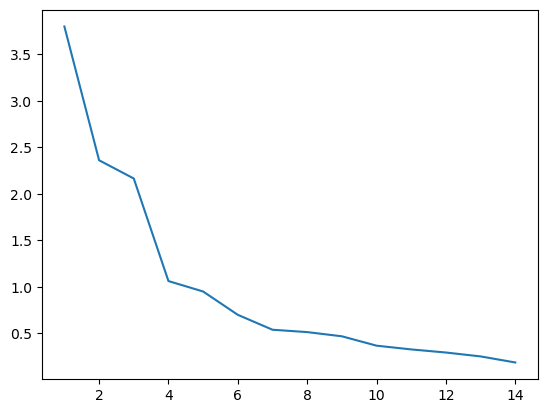

In [136]:
# Perform the factor analysis
fa = FactorAnalyzer()
fa.fit(x, 10)

#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

We will only use 3 factors here, given the big dropoff in eigenvalue after the 3rd factor. These factors have eigenvalues of 3.7, 2.3 and 2.1, meaning that they describe the variance of about 8.1 variables.

In [137]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
# loads = fa.loadings_
# print(loads)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [138]:


loads = fa.loadings_                                # get the factor loadings
loads = pd.DataFrame(loads)                         # bring them into a data frame
factor_head = []                                    # create an empty variable for collecting headings

for f in range(1, loads.shape[1]+1):                # create a Factor x for each factor where x is 1, 2, ... 
    factor_head.append('Factor_'+str(f))

loads.columns = factor_head                         # add the factor heads to the loads data frame
loads['variables'] = variables                      # add the variable names to the loads data frame
loads.set_index('variables', inplace=True)          # set the variables as the index
loads.style.highlight_max(color = 'darkgreen', axis = 0)

,Factor_1,Factor_2,Factor_3
variables,,,
Baggage handling,0.023463,0.764748,0.027693
Checkin service,0.143512,0.284182,0.028882
Cleanliness,0.858420,0.088148,-0.001708
Departure/Arrival time convenient,-0.029508,0.059681,0.501384
Ease of Online booking,0.030231,0.020914,0.932775
Food and drink,0.752639,0.010946,0.006167
Gate location,-0.033828,-0.032311,0.504044
Inflight entertainment,0.745693,0.466750,0.012034
Inflight service,0.018131,0.799771,0.018252


<AxesSubplot: >

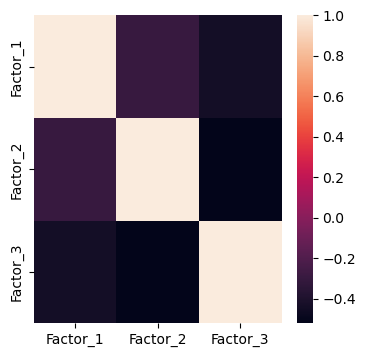

In [139]:
plt.figure(figsize=(4,4))
c= loads.corr()
sns.heatmap(c)

In [140]:
# define a function that will identify the highest loading variable on each factor.

# Argurments 
#     (1) the dataframe containing the loads 
#     (2) the factor name
#     (3) the number of variable loading you want to see

def factor_loading (loads_df, factor_name, n):
      factor_df = loads_df[factor_name]
      factor_df_as = factor_df.iloc[loads_df[factor_name].abs().argsort()][::-1]
      print('-----------   ', factor_name, '   -------------------------')
      print(factor_df_as.head(n))
      return factor_df_as

In [141]:
for f in factor_head:
      f = factor_loading(loads, f, 7)

-----------    Factor_1    -------------------------
variables
Cleanliness               0.858420
Seat comfort              0.789990
Food and drink            0.752639
Inflight entertainment    0.745693
Online boarding           0.395453
Inflight wifi service     0.168270
Checkin service           0.143512
Name: Factor_1, dtype: float64
-----------    Factor_2    -------------------------
variables
Inflight service          0.799771
Baggage handling          0.764748
On-board service          0.701154
Leg room service          0.481442
Inflight entertainment    0.466750
Checkin service           0.284182
Inflight wifi service     0.128271
Name: Factor_2, dtype: float64
-----------    Factor_3    -------------------------
variables
Ease of Online booking               0.932775
Inflight wifi service                0.758091
Gate location                        0.504044
Departure/Arrival time convenient    0.501384
Online boarding                      0.359065
Leg room service             

In [142]:
# Get variance of each factors
Factor_Variance = fa.get_factor_variance()
print(f'SS Loadings: {Factor_Variance[0]}')
print(f'Proportiion Var: {Factor_Variance[1]}')
print(f'Cumulative Var: {Factor_Variance[2]}')

SS Loadings: [2.70695385 2.29546721 2.0893549 ]
Proportiion Var: [0.19335385 0.16396194 0.14923964]
Cumulative Var: [0.19335385 0.35731579 0.50655543]


In [143]:

#Create the factors
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]

#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.8762877916624101, array([0.875, 0.878])) (0.794291693309021, array([0.792, 0.796])) (0.7679754211110685, array([0.766, 0.77 ]))


In [144]:
# I don't understand how this code does what it does.
# How does the funtion know about the factories?
# I susspect that these factor are using all of the variable to but the factor not just the ones identified as significatnt.
new_variables = fa.fit_transform(x)

In [145]:
(new_variables)

array([[ 1.26861201,  0.62004252,  0.0798816 ],
       [-1.88096531, -0.4541949 ,  0.12529103],
       [ 1.41595808,  0.3401227 , -0.71489468],
       ...,
       [ 0.5799899 ,  0.35088142, -1.21598844],
       [-1.92869116, -0.28474734, -1.06702265],
       [-1.90731764, -0.71957062,  0.01083048]])

In [146]:
nv_df = pd.DataFrame(new_variables)

In [147]:
nv_df.columns = ['Comfort', 'Service', 'Convenience']
nv_df.head(10)

,Comfort,Service,Convenience
0,1.268612,0.620043,0.079882
1,-1.880965,-0.454195,0.125291
2,1.415958,0.340123,-0.714895
3,-1.263913,-0.380717,1.271037
4,0.343459,-0.254943,0.168946
5,-1.949256,0.267424,-0.293395
6,-1.278611,0.409766,-0.411202
7,0.905011,1.236820,0.781344
8,-0.394362,-2.290404,-0.639608
9,-0.845307,-0.395135,0.309200


In [148]:
x.shape

(103904, 14)

In [149]:
df_test = df.sample(500)
#value = pg.normality(df_test['Departure Delay in Minutes'])
value = pg.normality(df_test)
print(value)

                                          W          pval  normal
Unnamed: 0                         0.961980  4.491320e-10   False
id                                 0.958297  1.085340e-10   False
Age                                0.986237  1.148789e-04   False
Flight Distance                    0.884972  7.631114e-19   False
Inflight wifi service              0.931142  2.106629e-14   False
Departure/Arrival time convenient  0.892098  2.962624e-18   False
Ease of Online booking             0.928825  1.139734e-14   False
Gate location                      0.908592  8.962401e-17   False
Food and drink                     0.898177  9.931495e-18   False
Online boarding                    0.906301  5.441553e-17   False
Seat comfort                       0.873573  9.856433e-20   False
Inflight entertainment             0.883809  6.152163e-19   False
On-board service                   0.888677  1.532661e-18   False
Leg room service                   0.889054  1.646864e-18   False
Baggage ha